In [1]:
# 시계열 문제
# AR MA ARMA ARIMA
# RNN 순환 신경망
# RNN 구조
# LSTM
# 게이트 순한 신경망 GRU
# 양방향 RNN

In [2]:
# 문제점
# 불규칙 변동
  #  규칙성이 없다. 우연에의한 발생  전쟁, 홍수, 화재, 지진 ,파업등

# 추세 변동
  # 장기적인 변화 추세 - 단기기간에는 추세 변동을 찾기 어려움   GDP, 인구증가율

# 순환 변동
  # 일정한 기간을 주기로 순환적으로 나타나는 변동  - 1년단위의 경기변동  분기별

# 계절 변동
  # 계절적요인이나 사회적 관습에 따라 1년 주기로 발생하는 것을 의미

In [3]:
# 규칙적(트랜드, 분산의 변화 없음) / 불규칙

In [4]:
# 규칙적인 패턴을 찾는 문제
# 다양한 알고리즘이 존재


In [5]:
# AR 모델(AutoGegressive) 자기회귀 : 이전 관측값이 이후 관측값에 영향을 준다는 아이디어
# 모수에 과거시검을 곱합

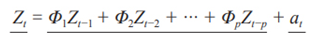

In [6]:
# P시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 바다는 모형

In [ ]:
# MA(Moving Average) 이동 평균 : 평균 또는 시계열 그래프에서 Y값이 변화하는 상황에 적합한 회귀 모델
# 윈도우 개념 - 이동평균 모델  매개변수에 과저시점의 오차를 곱함

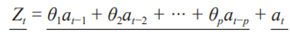

In [7]:
# AR모델처럼 이전 데이터의 상태에서 현재 데이터의 상태를 추론하는것이 아닌 이전 데이터의 오차에서 현재 데이터의 상태를 추론
# ARMA는 AR MA를 합친것(AutoGregressive Moving Average)

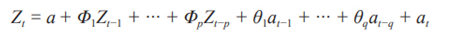

In [8]:
#ARIMA 모델(AutoRgressive Integrated Moving Average) 자기회귀 누적 이동 평균
# ARIMA(p,d,q)
# p : 자기 회귀
# d: 차분 차수
# q: 이동 평균 차수
# fit(), predict()
# statsmodels 라이브러리
  # 검정 및 추정, 회귀 분석, 시계열 분석

In [9]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
def parser(x):
  return datetime.strptime('199'+x,'%Y-%m')

In [23]:
series = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%23002.%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98/SBUX.csv'
,header=0,parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)

ValueError: ignored

In [12]:
series.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,86.260002,86.870003,85.849998,86.589996,84.145752,4921900
1,2019-12-12,88.000000,88.889999,87.540001,88.209999,85.720032,10282100
2,2019-12-13,88.019997,88.790001,87.580002,88.669998,86.167046,6714100
3,2019-12-16,89.139999,89.300003,88.430000,88.779999,86.273941,6705600
4,2019-12-17,88.870003,88.970001,87.470001,88.129997,85.642288,7296900


In [15]:
model = ARIMA(series,order=(5,1,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [24]:
# 순환신경망 RNN(Recurrent Neural Network)
# 기존순환신경망 -> memory  ( 현재까지 입력데이터를 요약한 정보)
# 새로운 입력이 네트웍으로 들어올때마다 기억이 조금씩 수정, 최종-> 입력전체를 요약한 정보
# 외부입력과 자기의 이전상태를 입력받아서 현재상태를 갱신

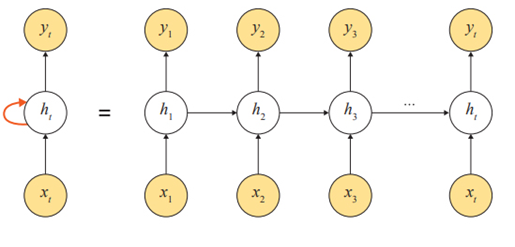

In [27]:
# 일대일 : 순환이 없고 순방향 네트웍
# 일대다 : 입력이하나 출력이 여러개 : 이미지를 입력하면 이미지에대한 설명을 문장으로 출력하는 이미지 캡션
# 다대일 : 입력이 다수고 출력이 하나 : 문장을 입력하면 긍정/부정으로 출력하는 감성분석
  # 아래 구조처럼 입력과 출력사이에 셀이 하나만 존재

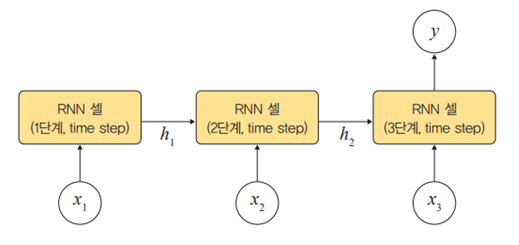

In [ ]:
# 층을 쌓아서 만든 다대일 구조

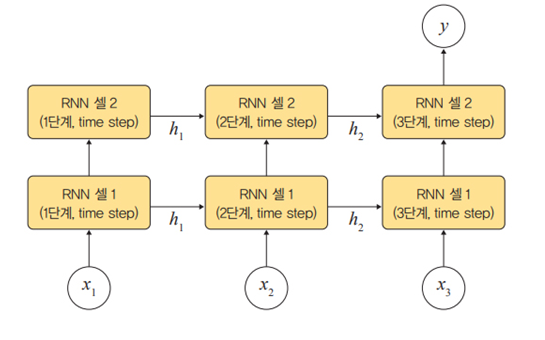

In [ ]:
# 다대다 : 입력과 출력이 다수인 구조 -> 언어번역기  : 파이토치에서는 구현이 까다로움... seq2seq 시퀀스 투 시퀀스

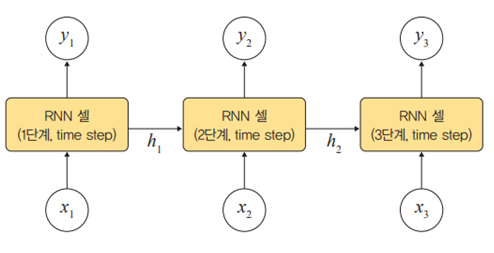

In [ ]:
# 동기화 다대다 : 입력 출력이 다수 : 문장에서 다음문장에 나올 단어를 예측... 비디오분류가 대표적

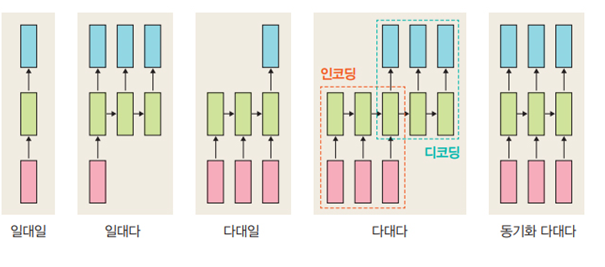

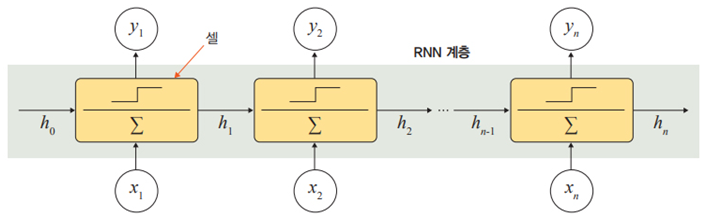

In [ ]:
# nn.RNNCell : SimpleRNN 계층에 대응되는 RNN셀
# nn.GRUCell : GRU 계층에 대응되는 셀
# nn.LSTMCell : LSTM 계층에 대응되는 셀
# 은닉층 계산은 현재 x와 이전상태의 h가 필요

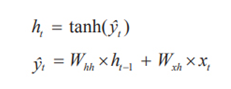

In [ ]:
# 출력층은 소프트맥스를 사용 

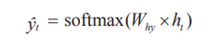

In [28]:
# RNN에서의 오차는 forward학습과 달리 각 단계(T)마다 오차를 측정
# 각 단계마다 평균 제곱오차를 이용해서 측정

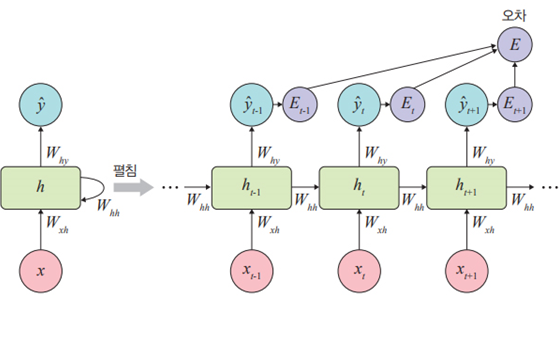

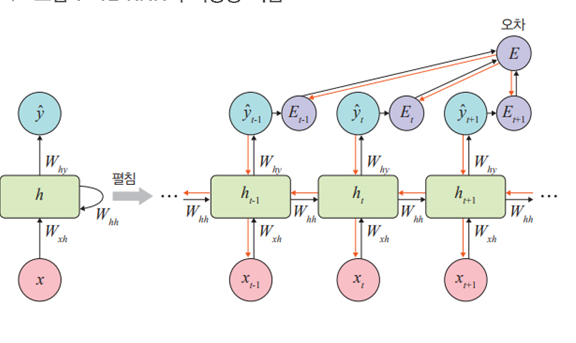

In [29]:
# 역전파. BPTT(BackPropagation Throught Time)을 이용해서 모든 단계마닥 처음부터 끝까지 역전파
# 기울기 소멸문제가  발생.몇단계까지만 역전파 생략된 BPTT(대략 5단계)  : LSTM GRU를 사용

In [30]:
# RNN 구조 - IMDB데이터셋
# torchtext가 필요 : 자연어처리에 필요한 라이브러리 내장

In [40]:
!pip install torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 5.4 MB/s 
     |████████████████████████████████| 735.5 MB 14 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.8.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.8.0 which is incompatible.


In [1]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [2]:
sart = time.time()

In [3]:
start=time.time()
TEXT = torchtext.legacy.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL = torchtext.legacy.data.Field(sequential=False) # 데이터 순서가 잇는지 나타내며 기본값은 true  여기서는 긍정부정만
# 긍정 2, 부정 1

In [4]:
torchtext.__version__

'0.9.0'

In [10]:
from torchtext.legacy import datasets

In [11]:
train_data, test_data =  datasets.IMDB.splits(TEXT,LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:03<00:00, 21.5MB/s]


In [18]:
print(vars(train_data.examples[0]))

{'text': ['but', 'how', 'can', 'you', 'stand', 'to', 'mange', 'a', 'baseball', 'team', 'that', "can't", 'win.', 'for', 'george', 'knox,', 'it', 'is', 'not', 'easy.', 'as', 'the', 'movie', 'opens,', 'roger', 'beaumont', '(joseph-gordon-levitt)', 'and', 'his', 'best', 'friend', 'j.p', '(milton', 'davis', 'jr.)', 'are', 'riding', 'on', 'thier', 'bikes', 'around', 'the', "angels'", 'stadium.', 'when', 'they', 'return', 'to', 'thier', 'foster', "mother's", 'home,', 'roger', 'is', 'suprised', 'to', 'have', 'a', 'visit', 'from', 'his', 'dad', '(dermot', 'mulroney).', 'his', 'mom', 'is', 'dead!', 'and', 'when', 'he', 'asks', 'his', 'father', 'when', 'they', 'going', 'to', 'be', 'a', 'family', 'again,', 'he', 'father', 'jokes', '"i', 'say', 'when', 'the', 'angels', 'win', 'the', 'division', 'championship"', 'so', 'later', 'on,', 'roger', 'and', 'j.p', 'hide', 'in', 'a', 'tree', 'to', 'watch', 'the', 'angels', 'play', 'baseball.', 'when', 'the', 'manger', 'george', 'knox', '(danny', 'glover)', '

In [35]:
for example in train_data.examples:
  text = [x.lower() for x in vars(example)['text'] ]
  text = [x.replace("<br","") for x in text]
  text = [ ''.join(a for a in x if a not in string.punctuation)  for x in text]
  text = [x for x in text if x]
  vars(example)['text'] = text

In [36]:
for example in test_data.examples:
  text = [x.lower() for x in vars(example)['text'] ]
  text = [x.replace("<br","") for x in text]
  text = [ ''.join(a for a in x if a not in string.punctuation)  for x in text]
  text = [x for x in text if x]
  vars(example)['text'] = text

In [37]:
# 훈련데이터와 검증 데이터 분리

In [38]:
import random

In [39]:
train_data, valid_data =  train_data.split(random_state=random.seed(0),split_ratio=0.8)

In [42]:
len(train_data),len(valid_data),len(test_data)

(20000, 5000, 25000)

In [44]:
# 단어집합 - 중복단어 제거
TEXT.build_vocab(train_data,max_size = 10000, min_freq=10,vectors=None) # vectors 임베딩 벡터... 사전학습된 벡터 여기서는 실제 학습을 하기때문에 사용하지 않음
LABEL.build_vocab(train_data)

In [45]:
LABEL.vocab.stoi


defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f5ad6cb6310>>,
            {'<unk>': 0, 'pos': 1, 'neg': 2})

In [46]:
# 전처리 완료   BucketIterator를 이용해서 데이터셋을 메모리로 가져옮

In [48]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [49]:
device

device(type='cpu')

In [50]:
embeding_dim = 100  # 각 단어를 100차원으로 조정( 임베딩 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300
train_iterator, valid_iterator,test_iterator =  torchtext.legacy.data.BucketIterator.splits(
    (train_data, valid_data,test_data),
    batch_size=BATCH_SIZE,
    device=device
)

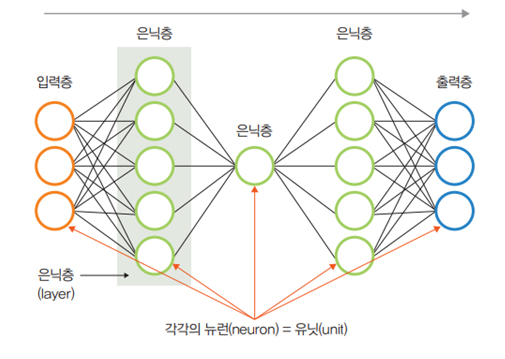

In [52]:
# layer의 유닛개수를 늘리는 것보다 계층 자체의 계수를 늘리는 것이 성능을 위해 더 좋음
# 은닉층의 층수는 비선형 문제를 좀더 잘 학습할수 있도록 하고, 층 안에 포함된 뉴런은 가중치와 바이어스를 계산하는 용도로 사용
# 많은 층과 유닛을 구성한후에 과적합이 발생하지 않도록 개수를 조정

In [53]:
# 구현

In [54]:
class RNNCell_Encoder(nn.Module):
  def __init__(self,input_dim, hidden_size):
    super(RNNCell_Encoder,self).__init__()
    self.rnn = nn.RNNCell(input_dim, hidden_size)
  def forward(self,inputs):
    bz = inputs.shape[1]
    ht = torch.zeros((bz,hidden_size)).to(device)
    for word in inputs:
      ht = self.rnn(word,ht)
    return ht


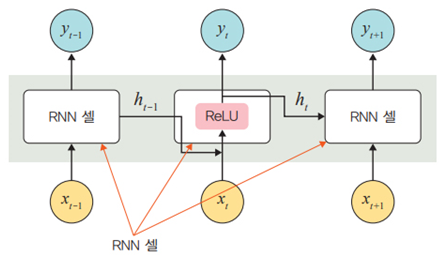

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
    self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
    self.fc1 = nn.Linear(hidden_size, 256)
    self.fc2 = nn.Linear(256,3)
  def forward(self,x):
    x = self.em(x)
    x = self.rnn(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [55]:
# 옵티마이져와 손실함수 정의

In [56]:
model = Net()
model.to(device)
loss_fn = nn.CrossEntropyLoss()# 다중 분류에 사용, nn.LogSoftmax와 nn.NLLoss 조합
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [61]:
# 모델 학습을 위한 함수 정의
def training(epoch, model, trainloader, validloader):
  correct = 0
  total = 0
  running_loss = 0
  model.train()
  for b in trainloader:
    x,y=b.text, b.label
    x,y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred,y) # crossEntropyLoss 손실 함수를 이용하여 오차를 계산
    optimizer.zero_grad() # 이전 기울기를 초기화
    loss.backward()
    optimizer.step()
    with torch.no_grad():
      y_pred = torch.argmax(y_pred, dim=1)
      correct += (y_pred == y).sum().item()
      total += y.size(0)
      running_loss += loss.item()
  epoch_loss = running_loss / len(trainloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어서 에포크 단계마다 오차를 구한다
  epoch_acc = correct /  total

  valid_correct = 0
  valid_total = 0
  valid_running_loss = 0
  model.eval()
  with torch.no_grad():
    for b in validloader:
      x,y = b.text, b.label
      x,y = x.to(device), y.to(device)
      y_pred = model(x)
      loss = loss_fn(y_pred,y) # crossEntropyLoss 손실 함수를 이용하여 오차를 계산      
      y_pred = torch.argmax(y_pred, dim=1)
      valid_correct += (y_pred == y).sum().item()
      valid_total += y.size(0)
      valid_running_loss += loss.item()
  epoch_valid_loss = valid_running_loss / len(validloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어서 에포크 단계마다 오차를 구한다
  epoch_valid_acc = valid_correct /  valid_total

  print('epoch: ', epoch,
        'loss： ', round(epoch_loss, 3),
        'accuracy:', round(epoch_acc, 3),
        'valid_loss： ', round(epoch_valid_loss, 3),
        'valid_accuracy:', round(epoch_valid_acc, 3)
        )
  return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc


In [ ]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,model,train_iterator,valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)